# <center>        **Introduction to Data Science (S1-22_DSECLZG523)-ASSIGNMENT**</center>

## Group No - 144

## Group Member Names:
1. MANOJ KUMAR M 
2. SAURAV KUMAR 
3. YASIR AHMED KENG 
4. MUHAMMAD IQBAL J 

# 1. Business Understanding

### 1. What is the business problem that you are trying to solve?
- Approximately 60% of world population are users of social media sites. Through these online networks, any user can make a post or disseminate news and it could become widespread. These sites do not verify the users or the content of their messages. As a result, some users attempt to disseminate false news via these platforms, to spread propaganda against a person, a society, an institution, or a political party. A human cannot identify all of this false news. Hence, machine learning classifiers that can identify fake news autonomously are in high demand.
<br> 

### 2. What data do you need to answer the above problem?
- We need a dataset which have both Real News and Fake News in nearly equal portion so that our Training model does not get biased. Also the data should be from all over the world, so that regional biasing is avoided. 
<br>

### 3. What are the different sources of data?
- Data is collected from sources of data e.g.: news channels, twitter, etc. We can even scrape the data manually or using automations. Many open source dataset website do provide very accurate dataset for multiple domain, and also different types of data. Kaggle, Open Dataset, UCI Machine Learning Repository etc are some of the common repositories where we can take data for our Trainig & Testing our models.
<br>

### 4. What kind of analytics task are you performing
- The major task that we need to solve is the labeling for the news, predicting whether the news is real or fake, and get maximum accuracy while comparing the predicted label with the actual label. So we need annotated data. (Annotation of data is time-consuming as well as hectic since we need to verify each news carefully). 

### Example of data we need:
 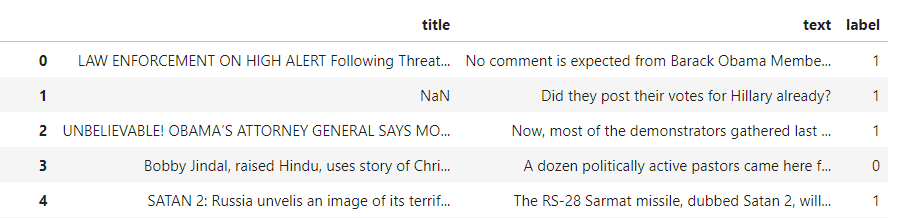
  
<br>
- Here we have Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).
<br>
- For analysis/EDA we can use different techniques like Word Plot, Histogram, etc. 
<br>
- Word Cloud is a data visualization technique used for representing text data, in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.
<br>
- But before doing the visualization part, we need to check for null values and also transform the data if necessary. Since we will always do not get the data in structured format.

- Score: 1 Mark in total (0.25 mark each)

# 2. Data Acquisition
 
For the problem identified, find an appropriate data set. Your data set must be unique) from any public data source.

- For our purpose we found one good public dataset which is called **[WELFake](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification)**

- (WELFake) is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, the authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.

- Dataset contains four columns: Serial number (starting from 0); **Title** (about the text news heading); **Text** (about the news content); and **Label** (0 = fake and 1 = real).

- There are 78098 data entries in CSV file out of which only 72134 entries are accessed as per the data frame.

- Published in:IEEE Transactions on Computational Social Systems: pp. 1-13 (DOI: 10.1109/TCSS.2021.3068519).

#### Note: Original data is huge (70,000 rows of text) hence time consuming on normal laptops / desktops, hence we manually reduced the size to 5000 rows, for demo purpose. This reduced dataset is uploaded to GitHub.



## 2.1 Download the data directly

In [1]:
# pip install -r requirements.txt

In [2]:
import nltk
import string
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import roc_auc_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


nltk.download('wordnet') # stop / filler words etc
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mmanm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mmanm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mmanm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# We are using requests module to download our data from GitHub repo and store it in local.

url = 'https://raw.githubusercontent.com/ManojKumarM75/MTech-Sem2-IDS/master/New_CSV_5k.csv'
r = requests.get(url, allow_redirects=True)

open('data.csv', 'wb').write(r.content)  # writing to the file and storing it in local.

17068089

- Since the data is taking up too much memory to load it and preprocess it, we will make a subset of the original dataset and use the subset of original data for EDA, Preprocessing and Training of the model.
- This way can reduce the computational time and also the training of the model will happen faster and can be run on generic computers(not with high configuration systems).
- We won't be able to see any major changes in accuracy score, or model performances.

## 2.2 Code for converting the above downloaded data into a dataframe

In [4]:
# Loading the data into data frame using pandas read_csv()

data = pd.read_csv("data.csv")

In [5]:
data

Unnamed: 0                                              title  \
0              0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1              1                                                NaN   
2              2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3              3  Bobby Jindal, raised Hindu, uses story of Chri...   
4              4  SATAN 2: Russia unvelis an image of its terrif...   
...          ...                                                ...   
4995        4995  Bangladesh seeks support to move fleeing Rohin...   
4996        4996  U.S. communications agency to unveil reform to...   
4997        4997  Heh : Hillary Literally Became the Definition ...   
4998        4998  Oregon Standoff Leaders Acquitted For Malheur ...   
4999        4999  First planned North Korea-U.S. contact in Trum...   

                                                   text  label  
0     No comment is expected from Barack Obama Membe...      1  
1        Did they post their votes for Hillary already?      1  
2      Now, most of the demonstrators gathered last ...      1  
3     A dozen politically active pastors came here f...      0  
4     The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
...                                                 ...    ...  
4995  DHAKA (Reuters) - Bangladesh is seeking intern...      0  
4996  WASHINGTON (Reuters) - The Republican chairman...      0  
4997  Posted 10/31/2016 2:37 pm by PatriotRising wit...      1  
4998  Oregon Standoff Leaders Acquitted For Malheur ...      1  
4999  SEOUL (Reuters) - Plans for the first contact ...      0  

[5000 rows x 4 columns]

In [6]:
# Displaying the count of rows and columns present in the dataset

data.shape

(5000, 4)

In [7]:
# Displaying the datatype of columns in our dataset

data.dtypes

Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [8]:
# Displaying the first five records

data.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [9]:
# Displaying the last five records

data.tail()

Unnamed: 0                                              title  \
4995        4995  Bangladesh seeks support to move fleeing Rohin...   
4996        4996  U.S. communications agency to unveil reform to...   
4997        4997  Heh : Hillary Literally Became the Definition ...   
4998        4998  Oregon Standoff Leaders Acquitted For Malheur ...   
4999        4999  First planned North Korea-U.S. contact in Trum...   

                                                   text  label  
4995  DHAKA (Reuters) - Bangladesh is seeking intern...      0  
4996  WASHINGTON (Reuters) - The Republican chairman...      0  
4997  Posted 10/31/2016 2:37 pm by PatriotRising wit...      1  
4998  Oregon Standoff Leaders Acquitted For Malheur ...      1  
4999  SEOUL (Reuters) - Plans for the first contact ...      0

## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [10]:
# Displaying the data columns

data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [11]:
# Displaying the data statistical information using dataframe.describe()

data.describe()

Unnamed: 0        label
count  5000.000000  5000.000000
mean   2499.500000     0.525600
std    1443.520003     0.499394
min       0.000000     0.000000
25%    1249.750000     0.000000
50%    2499.500000     1.000000
75%    3749.250000     1.000000
max    4999.000000     1.000000

In [12]:
data.describe(include='all')

Unnamed: 0                                              title  text  \
count   5000.000000                                               4968  4997   
unique          NaN                                               4930  4895   
top             NaN  WATCH: SENATOR JOHN MCCAIN Tells TMZ Sports Re...         
freq            NaN                                                  2    57   
mean    2499.500000                                                NaN   NaN   
std     1443.520003                                                NaN   NaN   
min        0.000000                                                NaN   NaN   
25%     1249.750000                                                NaN   NaN   
50%     2499.500000                                                NaN   NaN   
75%     3749.250000                                                NaN   NaN   
max     4999.000000                                                NaN   NaN   

              label  
count   5000.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.525600  
std        0.499394  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

- Since we are dealing with text data, statistical summary and statistical information is not valuable.

In [13]:
# Displaying the memory usage by each column in the dataset

data.memory_usage()

Index           128
Unnamed: 0    40000
title         40000
text          40000
label         40000
dtype: int64

In [14]:
# Checking for the null values

data.isnull()

Unnamed: 0  title   text  label
0          False  False  False  False
1          False   True  False  False
2          False  False  False  False
3          False  False  False  False
4          False  False  False  False
...          ...    ...    ...    ...
4995       False  False  False  False
4996       False  False  False  False
4997       False  False  False  False
4998       False  False  False  False
4999       False  False  False  False

[5000 rows x 4 columns]

In [15]:
# Showing the total count of null values present in the dataset
data.isnull().sum()

Unnamed: 0     0
title         32
text           3
label          0
dtype: int64

- We have detected the null values here.
- We need to preprocess the data and then we can move on to EDA or model training.

## 2.5 Observations

1. The size of the original data is huge enough to train our model well,  had 72134 rows presents and 4 columns. So, for demo purpose to run on normal PCs/laptops, we reduced the rows to 5000 nos.
2. The main columns for training our model are title, text and label. The title, text will be present in text format and label will present as integer.
3. We have one extra column name Unnamed: 0 which is containing the index which we need to drop. There are null values in our dataset, the most null values are present in title column and then text column. Since we cant train or do EDA on dataset which contains null values, it needs to be preprocessed.

# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [16]:
# Checking if duplicated value are present or not using duplicated()

data.duplicated().sum()

0

In [17]:
# Checking for null values using isnull()

data.isnull().sum()

Unnamed: 0     0
title         32
text           3
label          0
dtype: int64

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

In [18]:
# No Duplicates found.

In [19]:
# Droping the null values since we have enough data using dropna()

data.dropna(axis=0, 
            how="any", 
            inplace=True)

In [20]:
# Checking for null values after removing the null values using isnull()

data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [21]:
data.shape

(4965, 4)

## 3.3 Encode categorical data
('Encode categorical Data' cannot be performed on this dataset as we need words to run the algorithm. Label is already numeric).

## 3.4 Text data
1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words. Then we will move on to remove the filler words from the text using nltk library. NLTK have collection of stop words for each language. Since we have text in English language, we can use that and remove all the filler words.

In [22]:
# This function will remove the punctuations from the text
def remove_punctuation_text(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [23]:
# Applying the remove_punctuation_text() on title and text column of our dataset

data["title"] = data["title"].apply(lambda text: remove_punctuation_text(text))
data["text"] = data["text"].apply(lambda text: remove_punctuation_text(text))

#data.head()

In [24]:
def remove_extra(text):
    text = text.replace("—"," ")
    text = text.replace("”"," ")
    return text

data['text'] = data['text'].apply(lambda text: remove_extra(text))

In [25]:
# Converting title and text to lowercase

data['title'] = data['title'].str.lower()
data['text'] = data['text'].str.lower()

In [26]:
# Applying the tokenization:

data['preprocessed_text'] = data['text'].apply(lambda text: nltk.sent_tokenize(text))

In [27]:
# Counting the token 

token = Counter()  # Initialize the counter
for text in data["text"].values:
    for word in text.split():
        token[word] += 1

In [28]:
print("Total tokens after step-3: ", len(token))  # displaying the count

Total tokens after step-3:  88712


In [29]:
# Removing the stop words using gensim remove_stopwords()

data['title'] = data['title'].apply(lambda text: remove_stopwords(text))
data['text'] = data['text'].apply(lambda text: remove_stopwords(text))
data["preprocessed_text"] = data["text"].apply(lambda text: remove_stopwords(text))

data.head()  # displaying the updated data frame

Unnamed: 0                                              title  \
0           0  law enforcement high alert following threats c...   
2           2  unbelievable obama’s attorney general says cha...   
3           3  bobby jindal raised hindu uses story christian...   
4           4  satan 2 russia unvelis image terrifying new ‘s...   
5           5  time christian group sues amazon splc designat...   

                                                text  label  \
0  comment expected barack obama members fyf911 f...      1   
2  demonstrators gathered night exercising consti...      1   
3  dozen politically active pastors came private ...      0   
4  rs28 sarmat missile dubbed satan 2 replace ss1...      1   
5  s time sued southern poverty law centeron tues...      1   

                                   preprocessed_text  
0  comment expected barack obama members fyf911 f...  
2  demonstrators gathered night exercising consti...  
3  dozen politically active pastors came private ...  
4  rs28 sarmat missile dubbed satan 2 replace ss1...  
5  s time sued southern poverty law centeron tues...

In [30]:
# Counting the token 
token2 = Counter()  # Initialize the counter
for text in data["preprocessed_text"].values:
    for word in text.split():
        token2[word] += 1

In [31]:
print("Total tokens after stop words filtering:", len(token2))  # displaying the count

Total tokens after stop words filtering: 88383


In [32]:
data.label.value_counts()

1    2593
0    2372
Name: label, dtype: int64

## 3.4 Report

- No duplicated values were found.
- Some Null values were found in the dataset. Since there are more than 5k rows and only approximately ~30 rows had missing value, we choose to remove them. (Other options would be to  replace null values with some other values, preferably Mean, Median or Mode or if we have a categorical value we can use any specified value. But that might affect the accuracy of the model). We used dropna() of pandas to remove all those rows which had any missing values. After removing the null values from the dataset, we still have ~5k records.
- In pandas data frame we found no inconsistencies, but in original dataset we had inconsistencies. Pandas library automatically handled the inconsistencies for us. Pandas drop all the rows with inconsistencies, so we are left with ~5k records while originally we had around ~5800 records.
- We applied Tf-IDF to the text data.

## 3.5 Identifying  the target variables:
* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

**train_test_split()** is used to split the data.<br>
The label: This is our target column, since this column tells us whether the content in that text column is real or fake. (Also, we are focusing on the contents of the news -text column, and not on the title, to predict the label).

**Encoding / Discretize** : This label already contains integer values 0: Fake news and 1: Real news. Hence, no further encoding required on label. (Also, we are mostly focusing on the contents of the news -text column, and not on the title. This text column has to remain in text for the algorithm to function)

**Observations**: The label already contains integer values 0/1. We have around ~2600 real news labeled as 1 and ~2400 fake news labeled as 0. Hence, encoding is not required. Since we are mainly focusing on the content of news that does not include the title of the news, so we are skipping that column. The text column is very important since this column contains the news content. We will use this column in our model training. It is the source, and it contains the text data that we need to preprocessing.
- Note: Since we have text data, we cannot do the correlation here.


In [33]:
#Separate the data from the target such that the dataset is in the form of (X, y) or (Features, Label)

X_train, X_test, y_train, y_test=train_test_split(data['preprocessed_text'], data.label, test_size=0.2, random_state=7)

- Here we are using train test split to split our data into training and testing.
- We have kept test_size as 0.2 means 20% testing data and 80% training data.
- We have kept random_state=7, this way we can always get the same split.

# 4. Data Exploration using various plots

## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

- **Note:** Since we are dealing with text data, we can't plot the scatter plot. Instead, we can plot Word plot for the text data.

## Plotting the  distribution of label 

In [34]:
i = data.label.value_counts()  # getting the values of the index using value_counts()


fig = go.Figure(data=[go.Bar(    
            x=['Real','Fake'], y=i,
            text=i,
            textposition='auto',
        )])                           # Plotting the bar chart of Label True and False using plotty
 
fig.show()

- This is a Barchart for the label column of the dataset.
- We can see the distribution of the label in 0 (False) and 1 (True).
- We can say that the data is quite balanced here.
- However, we still have more real news than fake news.
- There is difference of near ~1k records.
- We can also say that data is not biased/ There are is no label inconsistency.

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

Word Plots & Bar charts are used, the advantages are discussed below.<br>
- **Word Plots**: Word Clouds have proven to be a game-changing visualization method for comprehending and identifying patterns and developing trends. Plotting the Word Cloud can provide a graphic depiction of the political objectives of prospective election candidates in a nation, or the customer evaluations on a recently released product.
- **Bar chart**: Number of times the words appeared in the title, text columns of the dataset etc very well displayed using a Bar chart as it's important to know the word count distribution of this column as well. Least and the most counts of words are also displayed on different charts.

### 4.2.1 Plotting the Word Cloud for the title column of the dataset


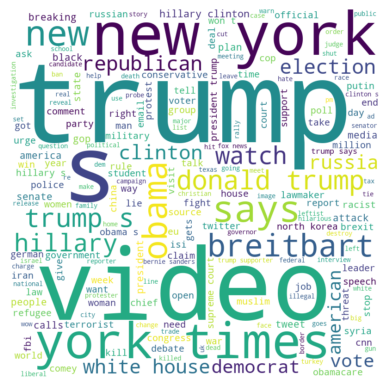

In [35]:
text1 = " ".join(title for title in data.title)  # Converting whole title column text into single string

wordcloud1 = WordCloud( width = 800, 
                       height = 800,
                       background_color ='white',
                       min_font_size = 10).generate(text1)  # Initializing word plot and feeding our string

plt.imshow(wordcloud1, interpolation='bilinear')  # Plotting it using Matplotlib
plt.axis("off")
plt.show()

- This is word plot.
- Here we can see many words, these words have high importance in the dataset, and we can also discover pattern what the data wants to convey.
- We can discover pattern in places, names, topic using word plot.
- Here we can see the words such as Trump, New York, etc. hoping up which means the dataset contains several records containing these words, these scenarios.

### 4.2.2 Plotting the Word Cloud for the text column of the dataset

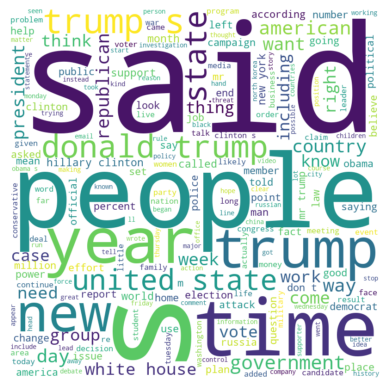

In [36]:
text2 = " ".join(title for title in data.text)   # Converting whole text column text into single string

wordcloud2 = WordCloud( width = 800, 
                       height = 800,
                       background_color ='white',
                       min_font_size = 10).generate(text2)  # Initializing word plot and feeding our string

plt.imshow(wordcloud2, interpolation='bilinear')  # Plotting it using Matplotlib
plt.axis("off")
plt.show()

- This the word plot telling us about the word distribution for the text column in our dataset.
- This plot shows us the words which are most occurring and hold importance in the text column, there are others words also which are hoping such as New York, etc.
- There are little to no filler words present in this plot but may be there in the dataset, we need to remove them first before training the model.

### 4.2.3 Displaying the Top Words in the title column of the dataset

In [37]:
title_cnt = Counter()  # Initialize the Counter

for text in data["title"].values:
    for word in text.split():
        title_cnt[word] += 1
        
title_cnt.most_common(10)  # displaying it 

[('trump', 1096),
 ('new', 644),
 ('video', 640),
 ('york', 468),
 ('times', 461),
 ('says', 260),
 ('hillary', 227),
 ('clinton', 223),
 ('obama', 209),
 ('house', 166)]

In [38]:
# Converting it to data frame

title_word_freq = pd.DataFrame(title_cnt.most_common(15), columns=['words', 'count']) 
title_word_freq.head()

words  count
0  trump   1096
1    new    644
2  video    640
3   york    468
4  times    461

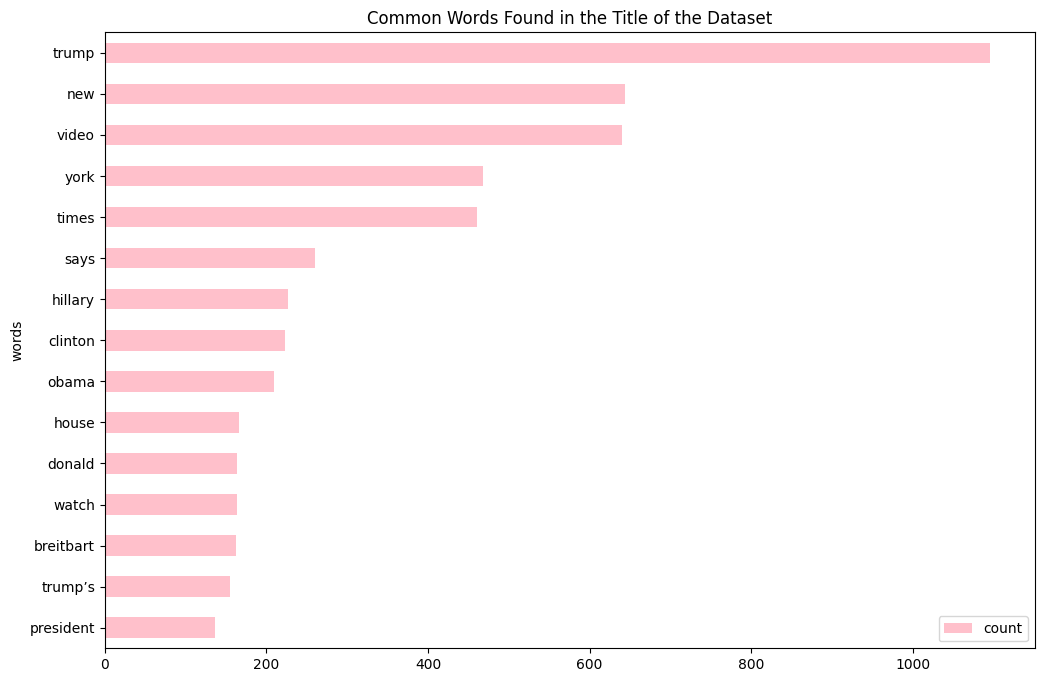

In [39]:
# Plotting it using Matplotlib

fig1, ax1 = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
title_word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax1,
                      color="pink")
ax1.set_title("Common Words Found in the Title of the Dataset")
plt.show()

- This is a bar chart of the words appeared in the title of the dataset.
- We are not using title in our model training.
- But it's important to know the word count distribution of this column as well. This plot is displaying very well this information.

### 4.2.4 Displaying the Top Words in the text column of the dataset

In [40]:
text_cnt = Counter()  # Initialize the counter
for text in data["text"].values:
    for word in text.split():
        text_cnt[word] += 1
        
text_cnt.most_common(10)  # displaying it 

[('said', 15964),
 ('s', 12949),
 ('trump', 12714),
 ('people', 6176),
 ('president', 5757),
 ('mr', 4955),
 ('new', 4954),
 ('clinton', 4080),
 ('like', 3843),
 ('state', 3755)]

In [41]:
# Converting it to data frame  

text_word_freq = pd.DataFrame(text_cnt.most_common(15), columns=['words', 'count'])
text_word_freq.head(20)

words  count
0         said  15964
1            s  12949
2        trump  12714
3       people   6176
4    president   5757
5           mr   4955
6          new   4954
7      clinton   4080
8         like   3843
9        state   3755
10      states   3418
11        time   3364
12  government   3342
13           t   3317
14       obama   3085

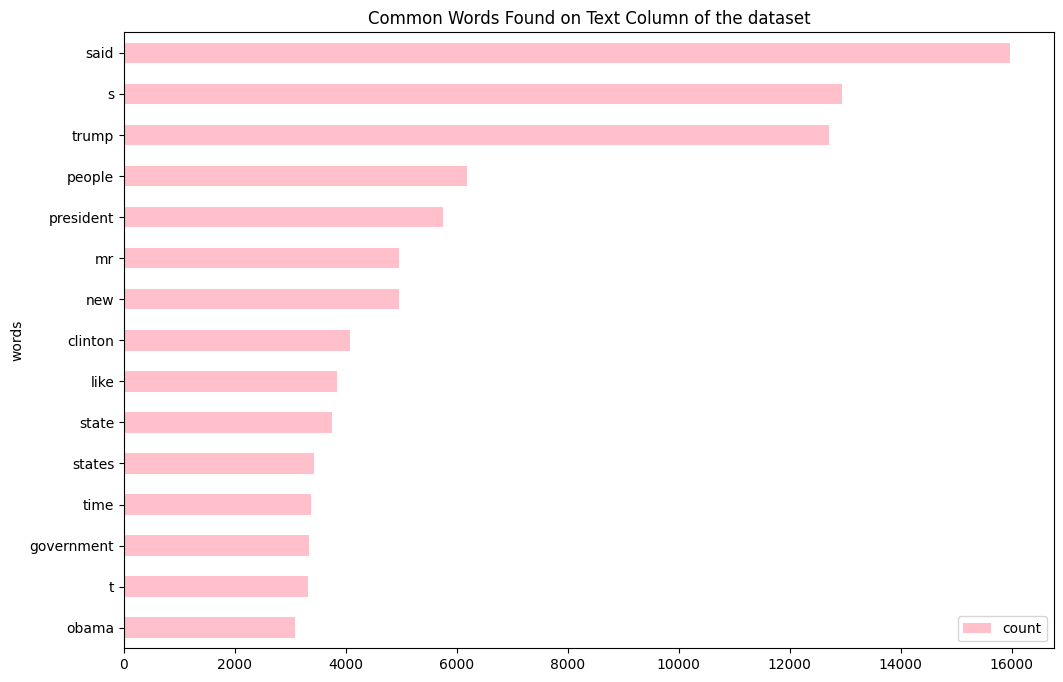

In [42]:
# Plotting it using Matplotlib

fig2, ax2 = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
text_word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax2,
                      color="pink")
ax2.set_title("Common Words Found on Text Column of the dataset")
plt.show()

- As we can see via the plotting, we mostly have filler words in the dataset  but that would be removed while data wrangling part.
- We can view the top 10 most appeared and their count as well.
- This can helpful while we understand the content of the text as well not get biased on the most rec curing words.
- We can plan our Data wrangling techniques according to these above plots. To make sure that our dataset is not having filler words and also not getting inconsistent

### 4.2.5 Displaying the  Word Plot in the text column of the dataset with label 0 (fake news)

In [43]:
fake_df = data.query('label == 0')
fake_df.head()

Unnamed: 0                                              title  \
3            3  bobby jindal raised hindu uses story christian...   
11          11   brexit offer hurt cost eu citizens eu parliament   
12          12  schumer calls trump appoint official oversee p...   
14          14  change expected espn political agenda despite ...   
15          15  billionaire odebrecht brazil scandal released ...   

                                                 text  label  \
3   dozen politically active pastors came private ...      0   
11  brussels reuters british prime minister theres...      0   
12  washington reuters charles schumer democrat se...      0   
14  sports fans turn espn protest network’s social...      0   
15  rio janeirosao paulo reuters billionaire marce...      0   

                                    preprocessed_text  
3   dozen politically active pastors came private ...  
11  brussels reuters british prime minister theres...  
12  washington reuters charles schumer democrat se...  
14  sports fans turn espn protest network’s social...  
15  rio janeirosao paulo reuters billionaire marce...

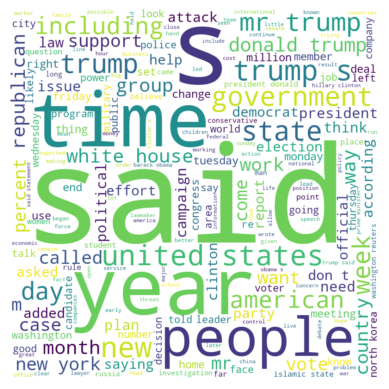

In [44]:
fake_text = " ".join(title for title in fake_df.text)   # Converting whole text column text into single string

wordcloud3 = WordCloud( width = 800, 
                        height = 800,
                        background_color ='white',
                        min_font_size = 10).generate(fake_text)  # Initializing word plot and feeding our string

plt.imshow(wordcloud3, interpolation='bilinear')  # Plotting it using Matplotlib
plt.axis("off")
plt.show()

- In this word plot we can use the words like trump, White House, New York have appeared more time implying that it have higher importance that other words.

- Using word plot we can not only know the recurring words but also discover what the text want to convey, it also considers words which have less appearing, it is very helpful in classification as well as in topic modeling.

### 4.2.6 Displaying the  Word Plot in the text column of the dataset with label  (real news)

In [45]:
real_df = data.query('label == 1')
real_df.head()

Unnamed: 0                                              title  \
0           0  law enforcement high alert following threats c...   
2           2  unbelievable obama’s attorney general says cha...   
4           4  satan 2 russia unvelis image terrifying new ‘s...   
5           5  time christian group sues amazon splc designat...   
6           6  dr ben carson targeted irs “i audit spoke nati...   

                                                text  label  \
0  comment expected barack obama members fyf911 f...      1   
2  demonstrators gathered night exercising consti...      1   
4  rs28 sarmat missile dubbed satan 2 replace ss1...      1   
5  s time sued southern poverty law centeron tues...      1   
6     dr ben carson tells story happened spoke obama      1   

                                   preprocessed_text  
0  comment expected barack obama members fyf911 f...  
2  demonstrators gathered night exercising consti...  
4  rs28 sarmat missile dubbed satan 2 replace ss1...  
5  s time sued southern poverty law centeron tues...  
6     dr ben carson tells story happened spoke obama

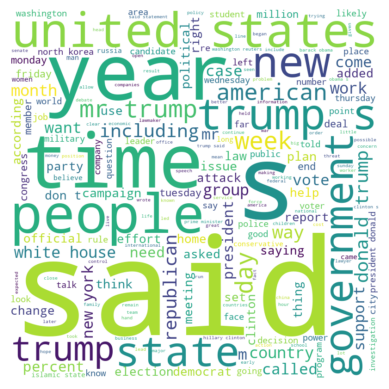

In [46]:
real_text = " ".join(title for title in fake_df.text)   # Converting whole text column text into single string

wordcloud4 = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(real_text)  # Initializing word plot and feeding our string

plt.imshow(wordcloud4, interpolation='bilinear')  # Plotting it using Matplotlib
plt.axis("off")
plt.show()

- Using the Word Plot here we can see that there are few words are hopping up which implies that the importance of those words are higher
- Ex: Uited state, People, Trump these words have appeared more time and are recurring words and have higher importance then other words

# 5. Data Wrangling

## 5.1 Univariate Filters 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF

#### Stemming:

- The act of reducing inflected (or sometimes derived) words to their word stem, base, or core form is known as stemming. 
- For example, if the text contains the terms walks and walking, stemming will remove the suffix to make them walk. However, if we have two terms, console and consoling, the stemmer will eliminate the suffix and turn them into consol, which is not a legitimate English word.

- There are several types of stemming algorithms accessible, the most well-known of which is the Porter stemmer, which is commonly used. We can implement PorterStemmer using the NLTK library.


In [47]:
# Initailzing Stemmer 

stemmer = PorterStemmer()

In [48]:
# Creating a custom function to apply stemming on our dataset

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [49]:
# Applying stemming using our custom function on training and testing dataset

X_train.apply(stem_words)
X_test.apply(stem_words)

669     havana reuter oppon cuban govern put forward u...
2020    washington reuter chairman senat foreign relat...
1715    beij reuter china s foreign minist wang yi sai...
1247    jon ritzheim infam hater muslim terrorist resp...
3737    new york reuter puerto rico’ feder oversight b...
                              ...                        
100     reuter person shot antitrump demonstr portland...
4157    republican parti constantli push accus racist ...
900     tuesday 1 novemb 2016 kim kardashian queen sel...
1228    21st centuri wire say news broke sunday night ...
928     novemb 11 2016 french plan ‘mega database’ cit...
Name: preprocessed_text, Length: 993, dtype: object

#### Lemmatization:

- It is the process of grouping together the inflected forms of a word, so they can be analyzed as a single item, identified by the word's lemma, or dictionary form.

- Lemmatization is a text normalization technique used in Natural Language Processing (NLP), that switches any kind of a word to its base root mode.

In [50]:
# Initailzing Lemmatizer

lemmatizer = WordNetLemmatizer()

# Creating a custom function to lemmatize the words 

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# Applying Lemmatization using our custom function on training and testing dataset
X_train.apply(lemmatize_words)
X_test.apply(lemmatize_words)

669     havana reuters opponent cuban government putti...
2020    washington reuters chairman senate foreign rel...
1715    beijing reuters china s foreign minister wang ...
1247    jon ritzheimer infamous hater muslim terrorist...
3737    new york reuters puerto rico’s federal oversig...
                              ...                        
100     reuters person shot antitrump demonstration po...
4157    republican party constantly pushing accusation...
900     tuesday 1 november 2016 kim kardashian queen s...
1228    21st century wire say news broke sunday night ...
928     november 11 2016 french plan ‘mega database’ c...
Name: preprocessed_text, Length: 993, dtype: object

- Since Lemmatization is taking too long (more than 1 hour) so we have commented the code for same.

TF-IDF:
    
- The term frequency-inverse document frequency (TF-IDF) is a measure used in information retrieval (IR) and machine learning to quantify the importance or relevance of string representations (words, phrases, lemmas, etc.) in a document among a collection of documents. (also known as a corpus).

In [51]:
#  Initialize a TfidVectorizer

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)  # setting the stop words as English 
tfidf_train=tfidf_vectorizer.fit_transform(X_train)  # applying to training set 
tfidf_test=tfidf_vectorizer.transform(X_test)   # applying to the testing set

In [52]:
tfidf_train  # displaying the tfidf training data

<3972x70022 sparse matrix of type '<class 'numpy.float64'>'
	with 767019 stored elements in Compressed Sparse Row format>

In [53]:
tfidf_test  # displaying the tfidf testing data

<993x70022 sparse matrix of type '<class 'numpy.float64'>'
	with 176905 stored elements in Compressed Sparse Row format>

## 5.2 Report observations

- Since we have text data, we implemented Stemming, it's straightforward to implement and fast to run. The trade-off here is that the output might contain inaccuracies, although they may be irrelevant for some tasks, like text indexing.

- Since we used Port Stemmer it produces the best output compared to other stemmers with less error rate. But it has one Limitation: Morphological modifications produced are not always real words.

- After that, we used lemmatization, since its obvious advantage of lemmatization is that it is more accurate. It is useful to get root words from the dictionary, unlike just cutting words like stemming. Lemmatization gives more context to chatbot conversations, as it recognizes words based on their exact and contextual meaning.

- TF-IDF calculates the number of times a word appears in each document, however the frequency diminishes if the word appears in other documents. Therefore, the word is not particularly important for the specific document, as it has also appeared commonly in other documents as well.

# 6. Implement Machine Learning Techniques

- Since we have binary classification, we choose one of the ML Model to be **Logistic Regression**. Logistic regression is one of the most popular algorithms for binary classification. Given a set of examples with features, the goal of logistic regression is to output values between 0 and 1, which can be interpreted as the probabilities of each example belonging to a particular class.

- And the Other one is the **passive-aggressive classifier**, it is used to classify data points into two groups. This algorithm can be used in a variety of different settings, including: Spam filtering in emails.

## The Sub optimal Solution: 

- This is our suboptimal Solution, where we trained multiple model with data and evaluated their performance.
- Decision Tree Performed Better than other Models, but not better than Passive Aggressive and Logistic Regression.
- Overall, the model performed well with accuracy score of 85%.
- As Compared to Passive Aggressive and Logistic Regression, we have higher numbers of False Positive and False Negative.

In [54]:
# Initialized Decision Tree Classifier 

classifier = DecisionTreeClassifier(
                criterion="gini",
                splitter="random",
                min_samples_split=2,
                random_state=42)

# Build a decision tree classifier from the training set (X_train, y_train).

classifier = classifier.fit(tfidf_train, y_train)

In [55]:
# For a classification model, the predicted class for each sample in X_test is returned.

y_pred = classifier.predict(tfidf_test)

In [56]:
# To find the accuracy score we can use sklearn to get the accuracy score.

print('Accuracy Score:', accuracy_score(y_test,y_pred))

Accuracy Score: 0.8630412890231621


In [57]:
c_m = confusion_matrix(y_test, y_pred, labels=[0,1])
c_m

array([[405,  68],
       [ 68, 452]], dtype=int64)

## 6.1 Implementing Passive Aggressive Classifier:
- Passive Aggressive Classifier belongs to the category of online learning algorithms in machine learning. It works by responding as passive for correct classifications and responding as aggressive for any miscalculation.

- The PA algorithm updates the model's parameters in order to correct the error while keeping the change in parameters as minimal as feasible. This assists the algorithm in generalizing well and avoiding overfitting.

- The primary benefit of PA classifiers is that they are easy to apply and can be used with big datasets because they only update the model's parameters when a misclassified example is encountered.


In [58]:
# Initializing the Passive Aggressive Classifier

pac = PassiveAggressiveClassifier(max_iter=50)

In [59]:
# Feeding the Passive Aggressive Classifier with the training data(tfidf_train and y_train)

pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [60]:
# Prediction on test data 

pac_y_pred = pac.predict(tfidf_test)

## 6.2 Implementing Logistic Regression:


- Logistic regression is also known as Binomial logistics regression. It is based on a sigmoid function where output is probability and input can be from -infinity to +infinity. 

- One advantage of using logistic Regression is Logistic regression is less inclined to over-fitting, but it can overfit in high dimensional datasets. One may consider Regularization (L1 and L2) techniques to avoid overfitting in these scenarios.

- One disadvantage of using logistic regression is Non-linear problems can't be solved with logistic regression since it has a linear decision surface

In [61]:
# Initializing the Logistic Regression

clf = LogisticRegression(random_state=0)

In [62]:
# Feeding the Logistic Regression model with the training data(tfidf_train and y_train)

clf.fit(tfidf_train, y_train)

LogisticRegression(random_state=0)

In [63]:
# Prediction on the test data

lg_y_pred = clf.predict(tfidf_test)

## 7. Conclusion 

## 7.1 Comparing Accuracy Score 

In [64]:
# calculating the accuracy score and displaying it for Passive Aggressive

pac_acc_score = accuracy_score(y_test, pac_y_pred)
print(f'Accuracy of PAC: {round(pac_acc_score*100,2)}%')

Accuracy of PAC: 91.94%


In [65]:
# calculating the accuracy score and displaying it for Logistic Regression

lg_acc_score = accuracy_score(y_test, lg_y_pred)
print(f'Accuracy of LR: {round(lg_acc_score*100,2)}%')

Accuracy of LR: 90.33%


- If we compare the accuracy score of both the model, we can see that Passive Aggressive Model have higher accuracy(92) than Logistic Regression (90).

## 7.2 Comparing Confusion Matrix and Plotting Confusion Matrix

In [66]:
# confusion matrix for Passive Aggressive Model

cm = confusion_matrix(y_test, pac_y_pred, labels=[0,1])
cm

array([[437,  36],
       [ 44, 476]], dtype=int64)

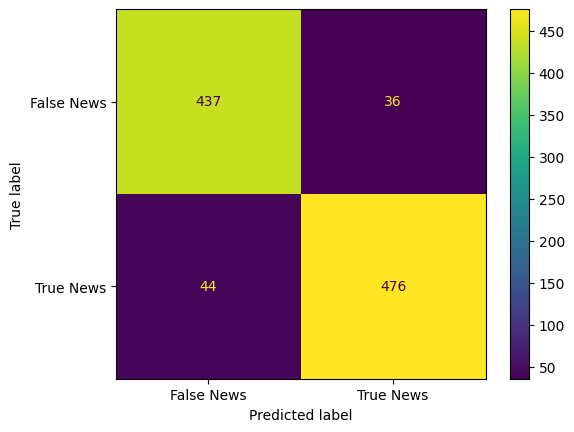

In [67]:
# Plotting the Confusion Matrix for Passive Aggressive

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["False News", "True News"])
disp.plot()
plt.show()

In [68]:
# Confusion matrix for Logistic Regression

cm2 = confusion_matrix(y_test, lg_y_pred, labels=[0,1])
cm2

array([[414,  59],
       [ 37, 483]], dtype=int64)

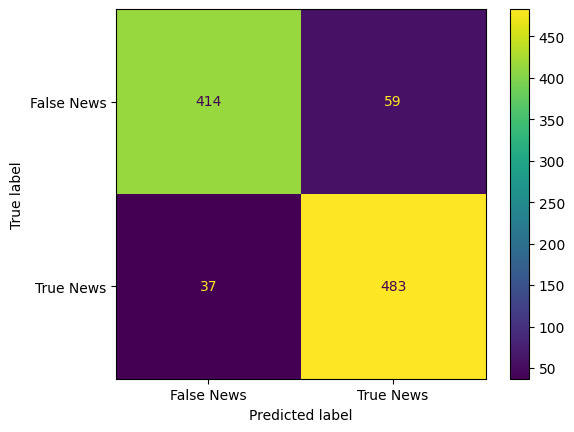

In [69]:
# Plotting the Confusion Matrix for Logistic Regression

disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=["False News", "True News"])
disp.plot()
plt.show()

- We can note that Passive Aggressive Model is predicted the labels more correctly in count than logistic regression.
- Passive Aggressive Model correctly predicted 437 news as fake news, while Logistic Regression was able to predict correctly only, 414 times.
- Since the True Positive and True Negative rate of Passive Aggressive model is higher, that the reason for higher accuracy.
- Via Confusion Matrix of Logistic Regression, we can see that the model is giving more false positive as compared to False Negative.

## 7.3 Calculating the ROC_AUC Score:

In [70]:
# Calculating the roc_auc score for passive-aggressive 

roc_auc_score(y_test, pac_y_pred)

0.9196373394047812

In [71]:
# Calculating the roc_auc score for logistic regression

roc_auc_score(y_test, lg_y_pred)

0.9020552122296309

- The ROC-AUC score ranges from 0.5 – 1, where 1 is the best score. Since in both the model we are getting 90%, Both performed well, but Passive Aggressive is having higher score than logistic regression.

## 7.4 Comparing the Classification Report:

In [72]:
# Creating Classification Report for Passive Aggressive:

print('\n Classification report:\n', classification_report(y_test, pac_y_pred))


 Classification report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       473
           1       0.93      0.92      0.92       520

    accuracy                           0.92       993
   macro avg       0.92      0.92      0.92       993
weighted avg       0.92      0.92      0.92       993



In [73]:
# Creating Classification Report for Logistic Regression

print('\n classification report:\n', classification_report(y_test, lg_y_pred))


 classification report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       473
           1       0.89      0.93      0.91       520

    accuracy                           0.90       993
   macro avg       0.90      0.90      0.90       993
weighted avg       0.90      0.90      0.90       993



- From the above classification, we can say that Passive Aggressive have higher overall classification report than logistic regression.
- The Precision score for the label of 0 are nearly similar in both the Models, but there is small difference for label 1.
- The F1 Score in both the model is having a minute difference.
- The F1 Score is quite stable(0.90%) in Logistic Regression.
- The F1 Score is quite stable(0.92%) in Passive Aggressive.
- The Recall is having a little variation in both the Models.

## 8. Solution: 

- Fake news and scams have been around since before the Internet. The generally recognized meaning of Internet false news is: fictitious articles purposefully created to mislead readers. Fake news is spread on social media and by news sources in order to boost readership or as part of psychological warfare. To address this issue, we can use Machine Learning to build a Fake News Classifier; one potential approach is to gather a big dataset of news articles and their labels. (fake or real). This dataset can be used to build a machine learning algorithm to determine whether news stories are false or not.
- Obtaining a large and varied dataset of news articles, ensuring that the dataset is fair in terms of the number of false and real articles, and ensuring that the classifications are correct are some of the challenges in creating such a solution. Designing and developing an effective machine learning model, as well as fine-tuning its settings to achieve optimum performance, could be another challenge.
- For our purpose we found one good dataset which is called **[WELFake](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification)**. (WELFake) is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, the authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.

- Dataset contains four columns: Serial number (starting from 0); **Title** (about the text news heading); **Text** (about the news content); and **Label** (0 = fake and 1 = real).

- There are 78098 data entries in CSV file out of which only 72134 entries are accessed as per the data frame.

- Published in:IEEE Transactions on Computational Social Systems: pp. 1-13 (DOI: 10.1109/TCSS.2021.3068519).

- Later we found that dataset had missing values, to need to fix that by removing the null values since we had enough data so choose to remove the rows which had null values.

- Then we did EDA to better understand our data and find some insight from it. We used multiple plot like Word Plot, Barchart to understand the most occurring word in our dataset.

- After EDA we did Data Wrangling, since we had text data, so we implemented Lemmatization (Lemmatization in linguistics is the process of grouping together the inflected forms of a word, so they can be analyzed as a single item, identified by the word's lemma, or dictionary form) and TF-IDF (is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling).

- Finally, some choices that may need to be made during the development of this solution include choosing the best machine learning method (we choose Passive Aggressive Classifier and Logistic Regression) and choosing the best training and testing datasets. It may also be necessary to consider the solution's social consequences, such as possible biases in the dataset or the model's outputs.

- After careful observation, we trained our model. And evaluated them using Confusion Matrix, Classification Report which tell us how did our model performed on unseen data.

- Both the models performed quite well. Passive Aggressive had more accuracy and overall score than logistic regression.

- Later we can create API and upload our model to server, so any could with key can access it and test our model.


            --------------------------------------------------------------------------------------------------

- Future Scopes:

1. Model interpretability: While designing the machine learning model, we can prioritize interpretability, which means that we can design the model to provide explanations for the predictions it makes. This can be helpful in identifying the features or characteristics of an article that the model uses to classify it as fake or real.

2. Multimodal classification: Currently, most fake news classifiers rely solely on the text of the article for classification. However, incorporating additional modalities such as images, videos, and audio can potentially improve the accuracy of the classifier. For example, videos or images that accompany an article can be analyzed to determine if they have been edited or manipulated.

3. Support for Multilingual: Support for multiple languages in the context of developing a fake news classifier using machine learning. Given that fake news can be created and spread in many different languages, it is important to develop classifiers that can detect fake news across multiple languages. In some cases, it may be necessary to develop separate machine learning models for each language. This can be beneficial if there are significant differences in the way that fake news is spread or created in different languages.




##---------THE END ------------------##